In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
plt.rcParams.update({'figure.figsize': [12,6]}) # Set the standard figure size.

In [3]:
rcemip_nc = nc.Dataset("rcemip_default.nc", "r")

# Time series statistics.
time = rcemip_nc.variables["time"][:] / 86400. # Time in days

dz = rcemip_nc.variables["zh"][1:] - rcemip_nc.variables["zh"][:-1]
qlpath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["thermo"].variables["ql"][:,:] * dz[None,:], axis=1)
qipath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["thermo"].variables["qi"][:,:] * dz[None,:], axis=1)

qtpath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["default"].variables["qt"][:,:] * dz[None,:], axis=1)
qrpath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["default"].variables["qr"][:,:] * dz[None,:], axis=1)
qspath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["default"].variables["qs"][:,:] * dz[None,:], axis=1)
qgpath = np.sum(rcemip_nc.groups["thermo"].variables["rho"][:,:] * rcemip_nc.groups["default"].variables["qg"][:,:] * dz[None,:], axis=1)

olr = rcemip_nc.groups["radiation"].variables["lw_flux_up"][:,-2]
olr_cs = rcemip_nc.groups["radiation"].variables["lw_flux_up_clear"][:,-2]

In [4]:
# Profile statistics.

# Average over 10 days.
n_start = -241
n_end = -1

z  = rcemip_nc.variables["z" ][:]
zh = rcemip_nc.variables["zh"][:]

lw_flux_up = rcemip_nc.groups["radiation"].variables["lw_flux_up"][n_start:n_end,:].mean(axis=0)
lw_flux_dn = rcemip_nc.groups["radiation"].variables["lw_flux_dn"][n_start:n_end,:].mean(axis=0)
sw_flux_up = rcemip_nc.groups["radiation"].variables["sw_flux_up"][n_start:n_end,:].mean(axis=0)
sw_flux_dn = rcemip_nc.groups["radiation"].variables["sw_flux_dn"][n_start:n_end,:].mean(axis=0)
lw_flux_up_clear = rcemip_nc.groups["radiation"].variables["lw_flux_up_clear"][n_start:n_end,:].mean(axis=0)
lw_flux_dn_clear = rcemip_nc.groups["radiation"].variables["lw_flux_dn_clear"][n_start:n_end,:].mean(axis=0)
sw_flux_up_clear = rcemip_nc.groups["radiation"].variables["sw_flux_up_clear"][n_start:n_end,:].mean(axis=0)
sw_flux_dn_clear = rcemip_nc.groups["radiation"].variables["sw_flux_dn_clear"][n_start:n_end,:].mean(axis=0)

ql = rcemip_nc.groups["thermo"].variables["ql"][n_start:n_end,:].mean(axis=0) * 1e6
qi = rcemip_nc.groups["thermo"].variables["qi"][n_start:n_end,:].mean(axis=0) * 1e6
qr = rcemip_nc.groups["default"].variables["qr"][n_start:n_end,:].mean(axis=0) * 1e6
qs = rcemip_nc.groups["default"].variables["qs"][n_start:n_end,:].mean(axis=0) * 1e6
qg = rcemip_nc.groups["default"].variables["qg"][n_start:n_end,:].mean(axis=0) * 1e6

T0 = rcemip_nc.groups["thermo"].variables["T"][0,:]
T = rcemip_nc.groups["thermo"].variables["T"][n_start:n_end,:].mean(axis=0)

thlt_rad0 = rcemip_nc.groups["tend"].variables["thlt_rad"][0,:] * 86400.
thlt_rad = rcemip_nc.groups["tend"].variables["thlt_rad"][n_start:n_end,:].mean(axis=0) * 86400.

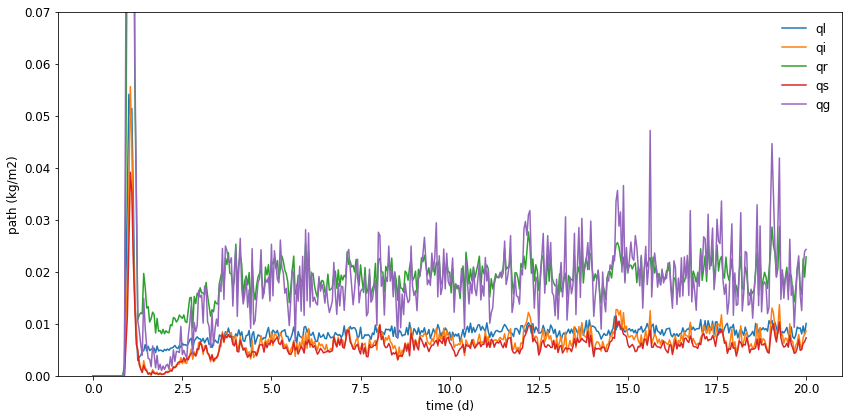

In [5]:
plt.figure()
#plt.plot(time, qtpath)
plt.plot(time, qlpath, label='ql')
plt.plot(time, qipath, label='qi')
plt.plot(time, qrpath, label='qr')
plt.plot(time, qspath, label='qs')
plt.plot(time, qgpath, label='qg')
plt.ylim(0, 0.07)
plt.legend(loc=0, frameon=False)
plt.xlabel('time (d)')
plt.ylabel('path (kg/m2)');
plt.tight_layout()

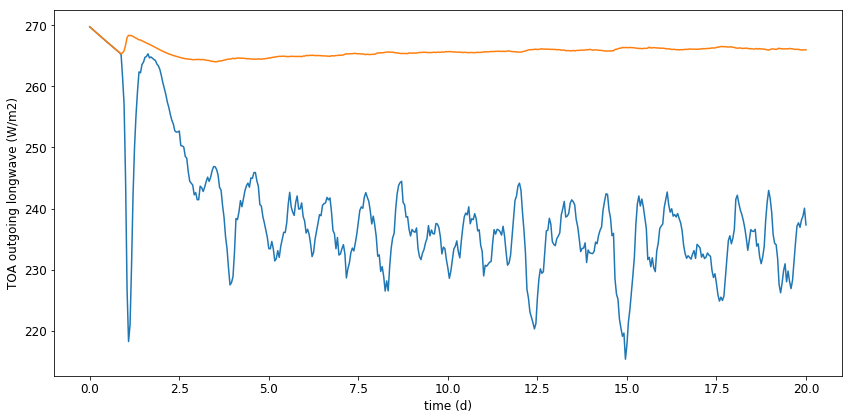

In [6]:
plt.figure()
plt.plot(time, olr, label="olr")
plt.plot(time, olr_cs, label="olr clear sky")
plt.xlabel('time (d)')
plt.ylabel('TOA outgoing longwave (W/m2)');
plt.tight_layout()

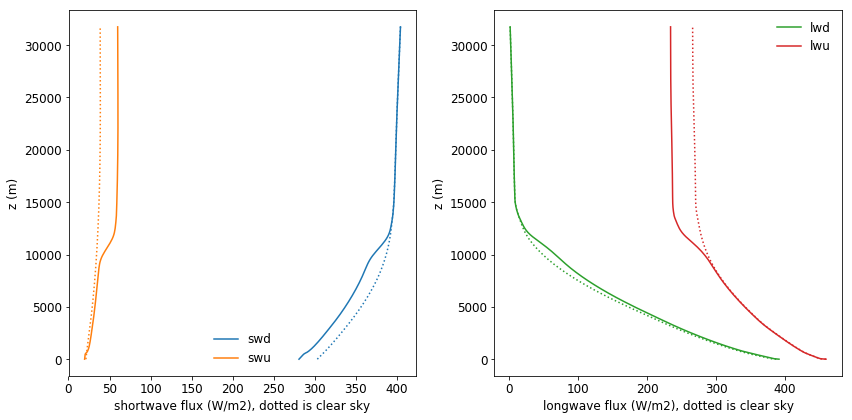

In [9]:
plt.figure()
plt.subplot(121)
plt.plot(sw_flux_dn, zh, 'C0-', label="swd")
plt.plot(sw_flux_up, zh, 'C1-', label="swu")
plt.plot(sw_flux_dn_clear, zh, 'C0:')
plt.plot(sw_flux_up_clear, zh, 'C1:')
plt.ylabel('z (m)')
plt.xlabel('shortwave flux (W/m2), dotted is clear sky');
plt.legend(loc=0, frameon=False)
plt.tight_layout()

plt.subplot(122)
plt.plot(lw_flux_dn, zh, 'C2-', label="lwd")
plt.plot(lw_flux_up, zh, 'C3-', label="lwu")
plt.plot(lw_flux_dn_clear, zh, 'C2:')
plt.plot(lw_flux_up_clear, zh, 'C3:')
plt.ylabel('z (m)')
plt.xlabel('longwave flux (W/m2), dotted is clear sky');
plt.legend(loc=0, frameon=False)
plt.tight_layout()

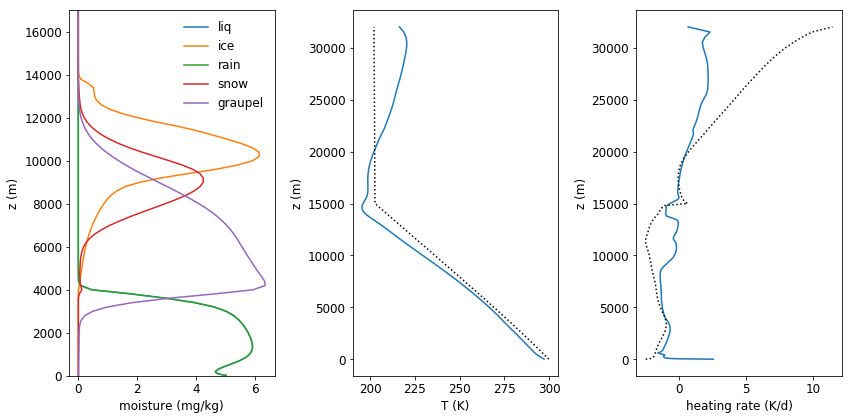

In [10]:
plt.figure()
plt.subplot(131)
plt.plot(qr, z, 'C0-', label="liq")
plt.plot(qi, z, 'C1-', label="ice")
plt.plot(qr, z, 'C2-', label="rain")
plt.plot(qs, z, 'C3-', label="snow")
plt.plot(qg, z, 'C4-', label="graupel")
plt.ylabel('z (m)')
plt.xlabel('moisture (mg/kg)');
plt.ylim(0, 17000)
plt.legend(loc=0, frameon=False)

plt.subplot(132)
plt.plot(T, z)
plt.plot(T0, z, 'k:')
plt.ylabel('z (m)')
plt.xlabel('T (K)');
plt.tight_layout()

plt.subplot(133)
plt.plot(thlt_rad, z)
plt.plot(thlt_rad0, z, 'k:')
plt.ylabel('z (m)')
plt.xlabel('heating rate (K/d)');
plt.tight_layout()